<a href="https://colab.research.google.com/github/adibhosn/Machine_learning_lab/blob/main/SVM_Monitoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
Neste notebook, será implementado um modelo de classificação utilizando O SVM.
O qual foi um dos algoritmos mais populares para classificação e regressão desde sua criação nos anos 1990 e permaneceu como o principal método de aprendizado de máquina supervisionado até meados da década de 2010.

# Dadaset
O conjunto de dados que utilizaremos é o Wine Dataset, nativo do Scikit-Learn. Ele contém 178 amostras de vinhos, cada uma com 13 atributos químicos (como teor de álcool, acidez, etc.), e três classes de vinhos (0, 1 e 2). Nosso objetivo é treinar um modelo SVM que, dada a análise química de um vinho, seja capaz de prever corretamente a classe a que ele pertence.

# Mas como o SVM funciona?

O Support Vector Machine (SVM) é um algoritmo de aprendizado de máquina supervisionado usado principalmente para classificação e regressão. Seu objetivo principal é encontrar um **hiperplano** ótimo que separe os dados de diferentes classes com a **maior** **margem** **possível**.


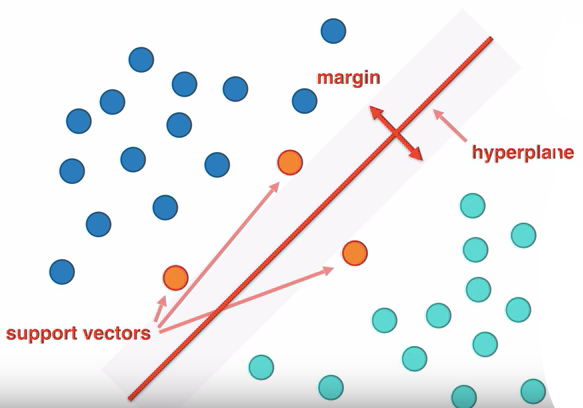

# Como pode ser visto na imagem acima:

O principal objetivo é encontrar um hiperplano que divide os dados em diferentes classes, nesse caso os circulos azuis e ciano.


Ele é encontrado pela **Margem** **Máxima**, que é a distância entre o hiperplano e os pontos de dados mais próximos (os vetores de suporte).



# Dados Lineares

Se os dados forem linearmente separáveis (podem ser classificados utilizando somente uma linha), usa um hiperplano simples.

**Obs.: Esse caso é o da primeira imagem**


# Dados não Lineares

Se os dados forem não linearmente separáveis, usa o **kernel trick** para transformar os dados em um espaço de maior dimensão onde a separação seja possível. Isso é muito útil pois em muitos problemas do mundo real, os dados não são linearmente separáveis no espaço original (ou seja, não é possível traçar uma linha reta ou um hiperplano para separar as classes). Veja a imagem a baixo, não há como separar essas classes com uma linha reta no espaço 2D original.

# O que é o Kernel Trick?

O kernel trick é uma técnica matemática sofisticada que permite ao SVM lidar com dados não linearmente separáveis de maneira eficiente. Ele faz isso ao mapear implicitamente os dados para um espaço de dimensão superior, onde se torna possível encontrar um hiperplano de separação. A grande vantagem é que esse mapeamento não precisa ser calculado explicitamente, o que economiza tempo e recursos computacionais.

# Tipos de Kernel

Os principais tipos de kernels são linear, polinomial, RBF (Gaussiano) e sigmóide.

A escolha do kernel depende das características dos dados e do problema.

O kernel RBF é geralmente a melhor escolha para dados não linearmente separáveis e com estruturas complexas.

Portanto, deve-se testar o tipo de Kernel em cada base de dados.

OBS.: Mais informações sobre os tipos de Kernels:

https://medium.com/@abhishekjainindore24/svm-kernels-and-its-type-dfc3d5f2dcd8

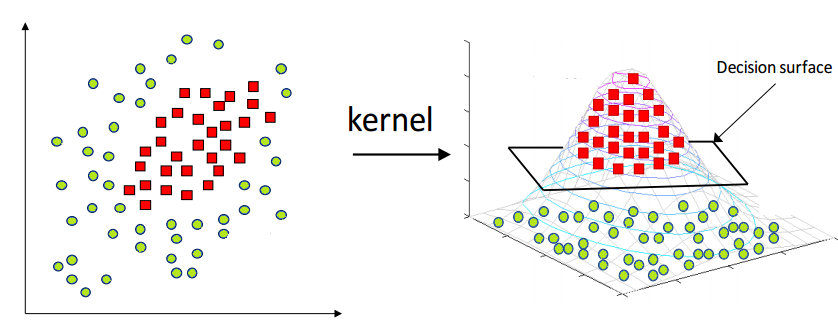

# Conceito de Erro no SVM e parâmetro C

O parametro C, representa a permissão de erros do modelo, de modo que, quanto maior o valor, menos erros o modelo vai aceitar, e consequentemente, vai ser necessário um tempo e processamento maior para que o modelo identifique o melhor hiperplano. Porém, quanto menor, mais erros o modelo aceita, o que reflete diretamente na acurácia do modelo.


Portanto, deve-se testar valores do parâmetro C ao fazer o treinamento, para que se ache um meio termo, pois um valor alto de C não necessáriamente significa que o modelo será melhor.

---

C = 0.1:

Margem grande.

Permite alguns erros de classificação.

Modelo mais simples e generalizável.

C = 1.0:

Margem intermediária.

Equilíbrio entre erros e margem.

Modelo com complexidade moderada.

C = 10:

Margem pequena.

Penaliza fortemente os erros.

Modelo mais complexo e talvez mais preciso.

# Agora que já se sabe como funciona, vamos para a implementação utilizando algumas outras técnicas relevantes para obter a melhor acurácia possível.

# 1 -Importando bibliotecas necessárias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# NumPy: Para manipulação de arrays e operações matemáticas.
# Matplotlib e Seaborn: Para visualização de dados e gráficos.
# Scikit-Learn: Para carregar o dataset, dividir os dados, treinar o modelo e avaliar o desempenho.

## 2 -Carregando dados

In [ ]:
from sklearn import datasets

dados = datasets.load_wine()
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# 3 -Definindo feature alvo

In [ ]:
df['target'] = dados.target
df['target'].value_counts()

,count
target,
1,71
0,59
2,48


In [ ]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
X = dados.data  # Características (features)
y = dados.target  # Feature alvo (target)

## 3 -Divisão dos Dados em Treino e Teste
Para avaliar o desempenho do modelo, dividimos os dados em dois conjuntos: treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# train_test_split: Divide os dados em 80% para treino e 20% para teste.
# test_size=0.2: 20% dos dados serão usados para teste.
# random_state=42: Garante que a divisão seja reproduzível.
# stratify=y: Mantém a proporção das classes nos conjuntos de treino e teste.

## 4 -Normalização dos Dados
O SVM é sensível à escala dos dados. Por isso, normalizamos as características para que todas estejam na mesma escala.

StandardScaler: é um método de padronização, que transforma os dados para que tenham média 0 e desvio padrão 1.

## O Que Acontece Se Não Normalizarmos os Dados?

Convergir lentamente: O algoritmo pode demorar mais para encontrar a solução ótima.

Ter desempenho ruim: Características com escalas maiores podem dominar o cálculo das distâncias, prejudicando a separação das classes.

Ser sensível a outliers: Valores extremos em características não normalizadas podem distorcer o hiperplano.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit_transform: Ajusta o scaler aos dados de treino (calcula a média e o desvio padrão) e aplica a transformação.
# transform: Aplica a mesma transformação aos dados de teste, usando a média e o desvio padrão calculados no treino.

# Por que não usar fit_transform no teste?: Porque o conjunto de teste deve ser tratado como dados "não vistos". Usamos os parâmetros
 #(média e desvio padrão) calculados no treino para evitar vazamento de dados (data leakage).

# 5. Tratamento de Desequilíbrio de Classes
Se as classes estiverem desbalanceadas, o modelo pode ter dificuldade em aprender as classes minoritárias. Para resolver isso, usamos a técnica SMOTE.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# SMOTE: Gera novos exemplos sintéticos para as classes minoritárias, equilibrando o conjunto de dados.
# fit_resample: Ajusta o SMOTE aos dados de treino e cria novos exemplos até que todas as classes tenham o mesmo número de amostras.

# 6 -Treinamento do Modelo SVM
Agora, vamos treinar o modelo SVM utilizando um kernel linear.

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True, random_state=42, C = 1.0)
svm.fit(X_train_bal, y_train_bal)


# SVC: Implementação do SVM no Scikit-Learn.
# kernel='linear': Usa um kernel linear, que é adequado para dados linearmente separáveis.
# probability=True: Permite que o modelo calcule probabilidades para cada classe.
# fit: Treina o modelo com os dados de treino balanceados.

SVC(kernel='linear', probability=True, random_state=42)

# 7 -Avaliação do Modelo
Depois de treinar o modelo, avaliamos seu desempenho usando métricas como matriz de confusão, relatório de classificação e acurácia.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = svm.predict(X_test)
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nAcurácia:", accuracy_score(y_test, y_pred))


# predict: Faz previsões com o modelo treinado.
# confusion_matrix: Mostra quantas previsões foram corretas e quantas foram erradas para cada classe.
# classification_report: Mostra métricas como precisão, recall e F1-score.
# accuracy_score: Calcula a porcentagem de previsões corretas.

Matriz de Confusão:
[[12  0  0]
 [ 1 13  0]
 [ 0  1  9]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


Acurácia: 0.9444444444444444


# 9 -Ajuste de Hiperparâmetros e Validação Cruzada
Para melhorar o desempenho do modelo, testamos diferentes combinações de hiperparâmetros usando GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid_search.fit(X_train_bal, y_train_bal)
print("Melhores parâmetros:", grid_search.best_params_)


# param_grid: Define os valores que queremos testar para os hiperparâmetros C (controle de regularização) e kernel (tipo de kernel).
# GridSearchCV: Testa todas as combinações de hiperparâmetros e usa validação cruzada para avaliar o desempenho.
# cv=5: Divide os dados em 5 partes para validação cruzada.
# fit: Treina o modelo com os melhores hiperparâmetros encontrados.
# best_params_: Mostra a melhor combinação de hiperparâmetros.

Melhores parâmetros: {'C': 1, 'kernel': 'rbf'}


# Depois de ver quais são os melhores parâmetros, fique a vontade para testar e ver as mudanças que podem ocorrer.